# 로지스틱 회귀 (LogisticRegression)
- 선형회귀 알고리즘 이용한 이진 분류 모델
    - Linear Regression을 분류 모델에 맞게 바꿔준 것
- Sample이 특정 클래스에 속할 확률 추정    
    
## 확률 추정
- 선형회귀처럼 입력 특성(Feature)에 가중치 합을 계산한 값을 로지스틱 함수를 적용해 확률 계산

$$
\hat{p} = \sigma \left( \mathbf{W}^{T} \cdot \mathbf{x} \right)\\
\sigma():\:logistic\,함수,\quad \mathbf{W}:\:가중치,\quad \mathbf{x}:\:입력 특성
$$

- ### 로지스틱 함수
    - 0과 1사이 실수 반환
    - S 자 형태의 결과 내는 **시그모이드 함수(sigmoid function)**

$$
\sigma(x) = \frac{1}{1 + \mathbf{e}^{-x}}
$$

- 샘플 **x**가 양성에 속할 확률

$$
\hat{y} = \begin{cases} 0\quad\hat{p}<0.5\\1\quad\hat{p}\geqq0.5 \end{cases}
$$

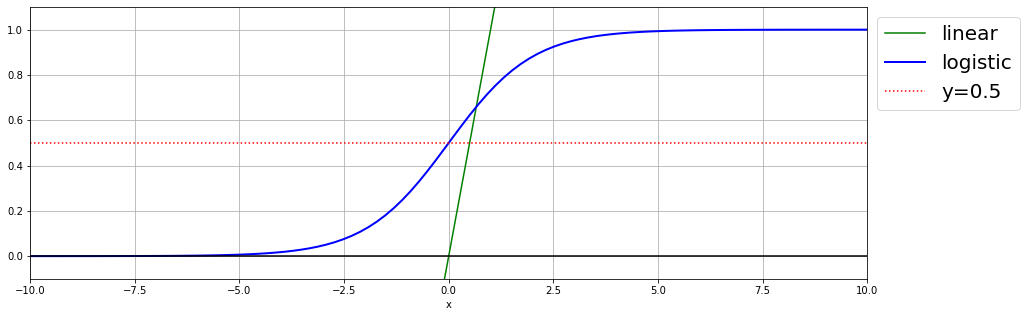

In [1]:
import numpy as np
import matplotlib.pyplot as plt

xx = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-xx))

plt.figure(figsize=(15, 5))


plt.plot(xx,xx, color='g', label='linear')
plt.plot(xx, sig, color='b', linewidth=2, label="logistic")

plt.plot([-10, 10], [0, 0], color='k', linestyle='-')  # x좌표, y좌표 - (-10, 0), (10, 0)
plt.plot([-10, 10], [0.5, 0.5], color='r', linestyle=':', label='y=0.5')

plt.xlabel("x")
plt.legend(bbox_to_anchor=(1,1), fontsize=20)
# x축, y축 지정 지역만 조회
plt.xlim(-10, 10)
plt.ylim(-0.1, 1.1)
plt.grid(True) 
plt.show()

## 손실 함수(Loss Function)
- 손실 함수의 오차 기준으로 모델 최적화시키는 것이 목적 -> 오차 적은 모델이 좋은 것
- 오차 구하는 모델
    - 로지스틱 함수에서 x? 가중치(W - 하이퍼 파라미터), 입력 특성(정해진 값) 곱한 값
- LogisticRegression의 전체 데이터 셋에 대한 손실함수는 아래공식과 같음
- **로그 손실(log loss)**, **Binary Cross Entropy** 라고 함
$$
L(\mathbf{W}) = - \frac{1}{m} \sum_{i=1}^{m}{\left[ y_{i} \log{\left( \hat{p}_i \right)} + \left( 1 - y_i \right) \log{\left( 1 - \hat{p}_i \right)} \right]}\\
y:\:실제값,\quad\hat{p}:\:예측확률
$$

- y(실제값) 이 1인 경우, $y_{i}\log{\left(\hat{p}_i\right)}$ 이 손실을 계산
- y가 0인 경우, $\left( 1 - y_i \right) \log{\left( 1 - \hat{p}_i \right)}$이 손실을 계산
- $\hat{p}$(예측확률)이 클수록 반환값은 작아지고 작을수록 값이 커짐 

## 최적화 
- 위 손실을 가장 적게하는 W(가중치) 탐색 
- 로그 손실함수는 최소값을 찾는 정규방적식이 없기 때문에 **LogisticRegression은 경사하강법 이용해 최적화 진행**
- 로그 손실을 $\mathbf{W}$로 미분하면 다음과 같음
    - 아래 도함수로 기울기 구해 기울기가 0이 될 때까지 W(가중치) update
$$
\frac{\partial}{\partial w_j} = \frac{1}{m} \sum_{i=1}^{m}{\left( \sigma \left( \mathbf{W}^{T} \cdot \mathbf{x}_i \right) - \mathbf{y}_i \right)} x_{ij}
$$


In [2]:
import numpy as np
np.log(1), np.log(0.5), np.log(0.1), np.log(0.000000001)

(0.0, -0.6931471805599453, -2.3025850929940455, -20.72326583694641)

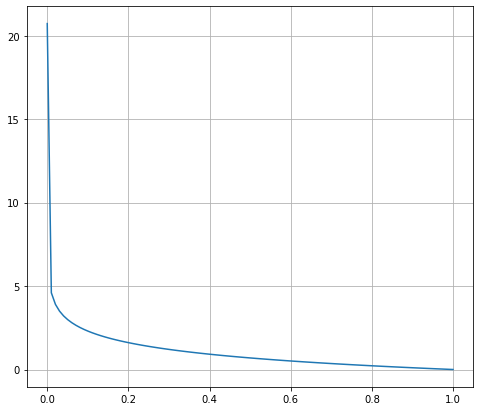

In [3]:
x = np.linspace(0.000000001, 1, 100)
y = - np.log(x)

# x.shape, y.shape
plt.figure(figsize = (8,7))
plt.plot(x, y)
plt.grid(True)
plt.show()

In [4]:
np.log(1), -np.log(0.9), -np.log(0.7), -np.log(0.5)

(0.0, 0.10536051565782628, 0.35667494393873245, 0.6931471805599453)

In [5]:
-np.log(0.4), -np.log(0.1), -np.log(0.01), -np.log(0.000000001)

(0.916290731874155, 2.3025850929940455, 4.605170185988091, 20.72326583694641)

## LogisticRegression 주요 하이퍼파라미터
- penalty: 과적합을 줄이기 위한 규제방식
    - 'l1(라쏘)', 'l2'(릿지 - 기본값), 'elasticnet', 'none' 
- C: 규제강도(기본값 1) - 작을수록 규제 강해짐
- max_iter(기본값 100) : 경사하강법 반복횟수

In [7]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X, y = load_breast_cancer(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 1)

In [8]:
# scaling
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

lr = LogisticRegression(C = 0.1, random_state = 1)
lr.fit(X_train_scaler, y_train)

LogisticRegression(C=0.01, random_state=1)

In [16]:
pred_train = lr.predict(X_train_scaler)
pred_test = lr.predict(X_test_scaler)

In [13]:
# C = 1 
accuracy_score(y_train, pred_train), accuracy_score(y_test, pred_test)

(0.9906103286384976, 0.965034965034965)

In [17]:
# C = 0.1
accuracy_score(y_train, pred_train), accuracy_score(y_test, pred_test)

(0.9507042253521126, 0.958041958041958)

In [20]:
print(classification_report(y_train, pred_train))

              precision    recall  f1-score   support

           0       0.99      0.87      0.93       159
           1       0.93      1.00      0.96       267

    accuracy                           0.95       426
   macro avg       0.96      0.94      0.95       426
weighted avg       0.95      0.95      0.95       426



In [21]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94        53
           1       0.94      1.00      0.97        90

    accuracy                           0.96       143
   macro avg       0.97      0.94      0.95       143
weighted avg       0.96      0.96      0.96       143

